# ImageNetで訓練済みのニューラルネットを用いた
# 手持ち画像の分類

以下ではCorel画像データセットの一部を使い画像分類を試みます。

分類はSVMとニューラルネット(MLP)の両方で実行し比較する

以下のデータをdownloadし、展開しておいてください。(270MBくらいあります）

http://www.tutarc.org/Seminar/Python/download/myPlants2.zip



In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3  #20%
session = tf.Session(config=config)
import keras
from keras import backend as K
K.set_session(session) 

Using TensorFlow backend.


# VGG19を訓練済みDNN (ImageNet)として利用

In [4]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np


In [5]:
fc2_training = np.empty((0,4096),float)
base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, 
              outputs=base_model.get_layer('fc2').output)


import os
num_files = 10
num_images = 20
step = 100
flist = []
for i in range(num_images):
    for j in range(num_files):
        k = j+1
        name = step * i + k
        flist.append(str(name)+".jpg")
        
total_images = 200
for i in range(total_images):
	img_path = "C:/Users/Aono/DeepLearning/data/myCorel/Corel1K/"+flist[i] 
	img = image.load_img(img_path, target_size=(224, 224))
	x = image.img_to_array(img)
	x = np.expand_dims(x, axis=0)
	x = preprocess_input(x)
	fc2_ft = model.predict(x)
	fc2_ft = np.array(fc2_ft)
	fc2_training = np.append(fc2_training, fc2_ft,axis=0)

print (fc2_training.shape)
np.save('npy/fc2_training.npy',fc2_training)


(200, 4096)


In [4]:
# 時間かかります
flat_list = [item for sublist in listAll for item in sublist]

# do training using pretrained network (takes some time) 
import numpy as np
fc2_training = np.empty((0,4096),float)

for i in range(len(flat_list)):
    if i % 400 == 0:
        print("Processing ...",(i+1)," data...")
    img_path = "all/"+flat_list[i]
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    fc2_ft = pp_model.predict(x)
    fc2_ft = np.array(fc2_ft)
    fc2_training = np.append(fc2_training, fc2_ft,axis=0)

print (fc2_training.shape)
np.save('fc2_trainingVGG16.npy',fc2_training)


Processing ... 1  data...
Processing ... 401  data...
Processing ... 801  data...
Processing ... 1201  data...
(1400, 4096)


In [6]:
# 未知データ（クエリ）の準備
# print("Query image processing...")
fc2_query20 = np.empty((0,4096),float)
base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, 
              outputs=base_model.get_layer('fc2').output)

num_files = 4
num_images = 20
step = 100
flist = []

for i in range(num_images):
    for j in range(num_files):
        k = j+1
        name = step * i + k + 10
        flist.append(str(name)+".jpg")

for i in range(0,80):
    img_path = 'C:/Users/Aono/DeepLearning/data/myCorel/test1K/'+flist[i]
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    fc2_ft = model.predict(x)
    fc2_ft = np.array(fc2_ft)
    fc2_query20 = np.append(fc2_query20,fc2_ft,axis=0)

print (fc2_query20.shape)
np.save('npy/fc2_query20.npy',fc2_query20)

(80, 4096)


In [7]:
import numpy as np
# data = np.load('./fc2_training.npy')
# print("dimension of data = ",data.shape)

data = fc2_training
numTrain = data.shape[0]
numFeatures = data.shape[1]

truth = np.zeros(numTrain, dtype=int)
for i in range(numTrain):
    truth[i] = i / 10
print(truth)

numTest = 80
testTruth = np.zeros(numTest, dtype=int)
for i in range(numTest):
    testTruth[i] = i / 4
print(testTruth)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19]
[ 0  0  0  0  1  1  1  1  2  2  2  2  3  3  3  3  4  4  4  4  5  5  5  5
  6  6  6  6  7  7  7  7  8  8  8  8  9  9  9  9 10 10 10 10 11 11 11 11
 12 12 12 12 13 13 13 13 14 14 14 14 15 15 15 15 16 16 16 16 17 17 17 17
 18 18 18 18 19 19 19 19]


In [8]:
# 混合行列の描画関数の定義
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pylab
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(12,9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=25)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=15)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=15)
    plt.yticks(tick_marks, classes,fontsize=15)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center", fontsize=15,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=20)
    plt.xlabel('Predicted label',fontsize=20)

accuracy =  0.8875
Confusion matrix, without normalization
[[3 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 3]]


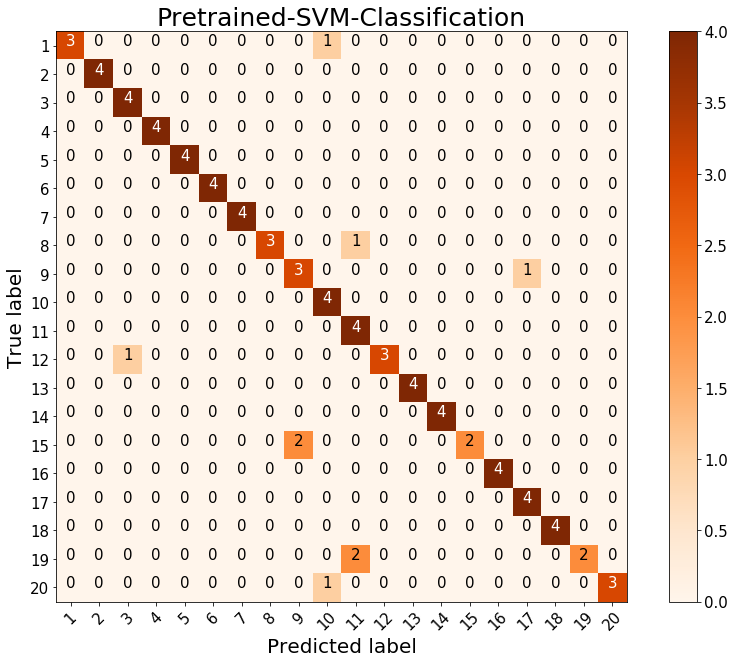

In [11]:
from sklearn import svm
from sklearn.metrics import confusion_matrix

# SVM (linear)
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(data, truth)
#テストデータの予測をする
predictLabel = svc.predict(fc2_query20)
cm = confusion_matrix(testTruth, predictLabel)
# print ("SVM(linear(10))\n",cm)

denominator = 0
numerator = 0
for i in range(num_images):
    numerator += cm[i,i]
    for j in range(num_images):
        denominator += cm[i,j]

accuracy = float(numerator)/denominator
print("accuracy = ",accuracy)
classes = ['1', '2', '3', '4', '5',
	'6', '7', '8', '9', '10',
	'11', '12', '13', '14', '15',
	'16', '17', '18', '19', '20']

plot_confusion_matrix(cm, classes=classes, title='Pretrained-SVM-Classification')
plt.savefig('pdf/Pretrained-SVM-Classification.pdf')
plt.show()

In [19]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(256,input_dim=4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(20,activation='softmax'))
my_compile = model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               1048832   
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                5140      
Total params: 1,053,972
Trainable params: 1,053,972
Non-trainable params: 0
_________________________________________________________________


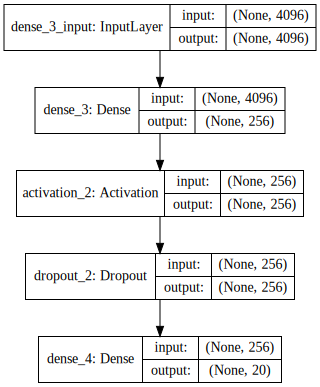

In [20]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, to_file='images/Python-Pretrained-Plant.jpg')
plot_model(model, show_shapes=True, to_file='pdf/Python-Pretrained-Plant.pdf')

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


In [21]:
print('訓練データ: シェープ = ', fc2_training.shape)
print('訓練データのラベル: シェープ = ', truth.shape)
import numpy as np
from keras.utils import np_utils


NB_CLASSES = 20
my_label  = np_utils.to_categorical(truth, NB_CLASSES)
thy_label = np_utils.to_categorical(testTruth, NB_CLASSES)

my_fit = model.fit(fc2_training, my_label, 
                   epochs=50, 
                   batch_size=128,
                   validation_data=(fc2_query20, thy_label))

訓練データ: シェープ =  (200, 4096)
訓練データのラベル: シェープ =  (200,)
Train on 200 samples, validate on 80 samples
Epoch 1/50
200/200 [==============================] - 0s 2ms/step - loss: 4.6033 - acc: 0.0650 - val_loss: 1.1496 - val_acc: 0.7375
Epoch 2/50
200/200 [==============================] - 0s 265us/step - loss: 1.0159 - acc: 0.7200 - val_loss: 0.4929 - val_acc: 0.8375
Epoch 3/50
200/200 [==============================] - 0s 265us/step - loss: 0.3317 - acc: 0.9250 - val_loss: 0.3554 - val_acc: 0.8875
Epoch 4/50
200/200 [==============================] - 0s 250us/step - loss: 0.1672 - acc: 0.9500 - val_loss: 0.2997 - val_acc: 0.8875
Epoch 5/50
200/200 [==============================] - 0s 255us/step - loss: 0.0990 - acc: 0.9550 - val_loss: 0.2740 - val_acc: 0.8625
Epoch 6/50
200/200 [==============================] - 0s 250us/step - loss: 0.0582 - acc: 0.9800 - val_loss: 0.2690 - val_acc: 0.8750
Epoch 7/50
200/200 [==============================] - 0s 255us/step - loss: 0.0633 - acc: 0.9900 - v

In [22]:
# Matplotlibのフォントの制御（大きさや種類）
%matplotlib inline
import numpy as np # Numpy
import matplotlib
import matplotlib.pyplot as plt # 描画ライブラリ
print (matplotlib.rcParams.get('font.family'))
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects

font_prop = fm.FontProperties()  
font_prop.set_style('normal')
font_prop.set_weight('light')
font_prop.set_size('12')

fp2 = font_prop.copy()# フォントプロパティ(FP)をコピー
fp2.set_size('20')# フォントプロパティ(FP)をコピー
fp2.set_family('serif')# フォントはSerif(明朝体など）に設定

['sans-serif']


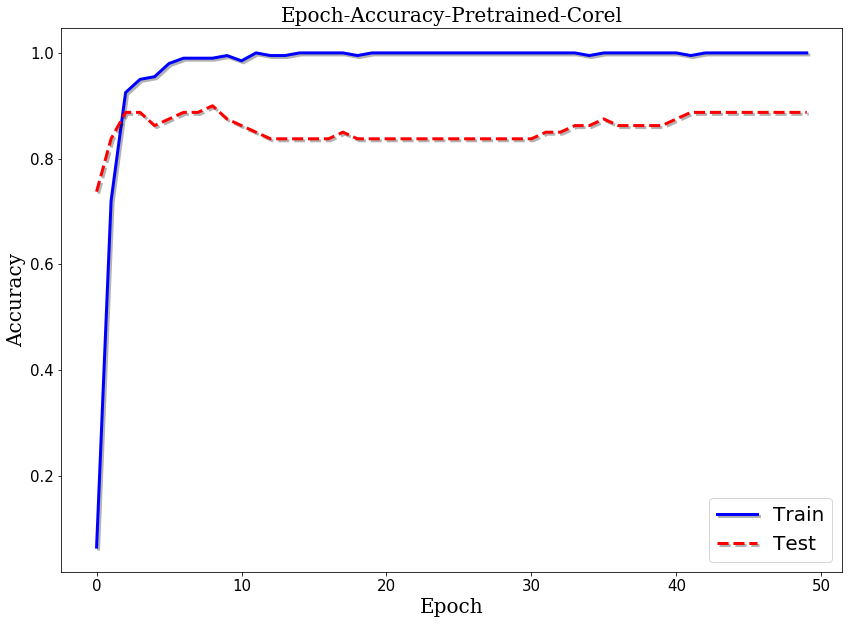

In [24]:
% matplotlib inline
import matplotlib.pyplot as plt

# 精度グラフの描画　% matplotlib inline
plt.figure(figsize=(14,10))

plt.plot(my_fit.history['acc'], 
         color='b', 
         linestyle='-', 
         linewidth=3, 
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
plt.plot(my_fit.history['val_acc'], 
         color='r', 
         linestyle='--',
         linewidth=3,
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])

plt.tick_params(labelsize=15)
plt.title('Epoch-Accuracy-Pretrained-Corel',fontsize=25,font_properties=fp2)
plt.ylabel('Accuracy',fontsize=20,font_properties=fp2)
plt.xlabel('Epoch',fontsize=20,font_properties=fp2)
plt.legend(['Train', 'Test'], loc='best', fontsize=20)

plt.savefig('pdf/Epoch-Accuracy-Pretrained-Corel.pdf')
plt.show()


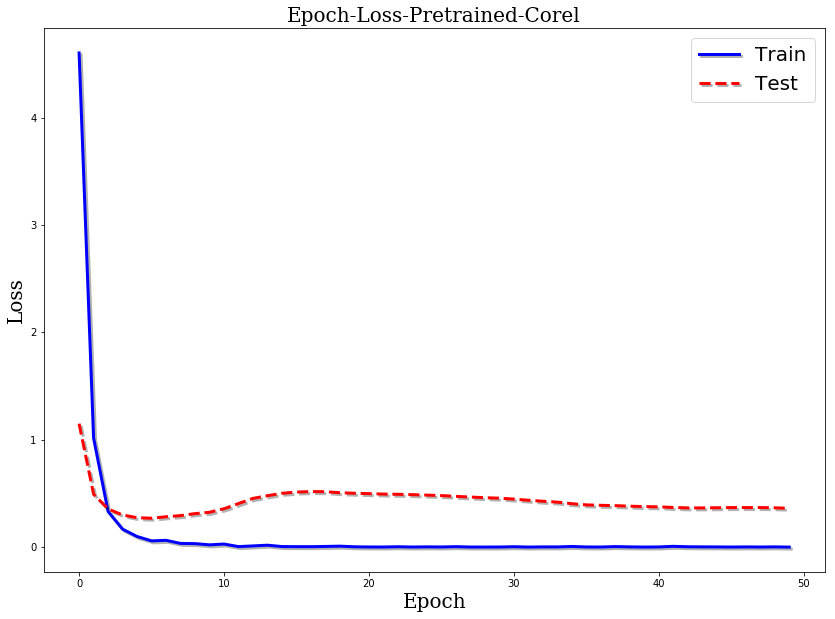

In [25]:
# 損失グラフの描画　% matplotlib inline
plt.figure(figsize=(14,10))

plt.plot(my_fit.history['loss'], 
         color='b', 
         linestyle='-', 
         linewidth=3, 
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
plt.plot(my_fit.history['val_loss'], 
         color='r', 
         linestyle='--',
         linewidth=3,
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])

plt.title('Epoch-Loss-Pretrained-Corel',fontsize=25,font_properties=fp2)
plt.ylabel('Loss',fontsize=20,font_properties=fp2)
plt.xlabel('Epoch',fontsize=20,font_properties=fp2)
plt.legend(['Train', 'Test'], loc='best', fontsize=20)
plt.savefig('pdf/Epoch-Loss-Pretrained-Corel.pdf')
plt.show()

In [27]:
a_pred = model.predict_classes(fc2_query20, batch_size=128, verbose=1)
print(a_pred)


80/80 [==============================] - 0s 825us/step
[ 0  0  0  0  1  1  1  1  2  2  2  2  3  3  3  3  4  4  4  4  5  5  5  5
  6  6  6  6  7  7  7  7  8  8  8  8  9  9 10  9 18 10 10 10  2  3 11 11
 12 12 12 12 13 13 13 13 14  8 14 14 15 15 15 15 16 16 16 16 17 17 17 17
 10 10 18 10 19 19 19 17]


Confusion matrix, without normalization
[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 3 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]]


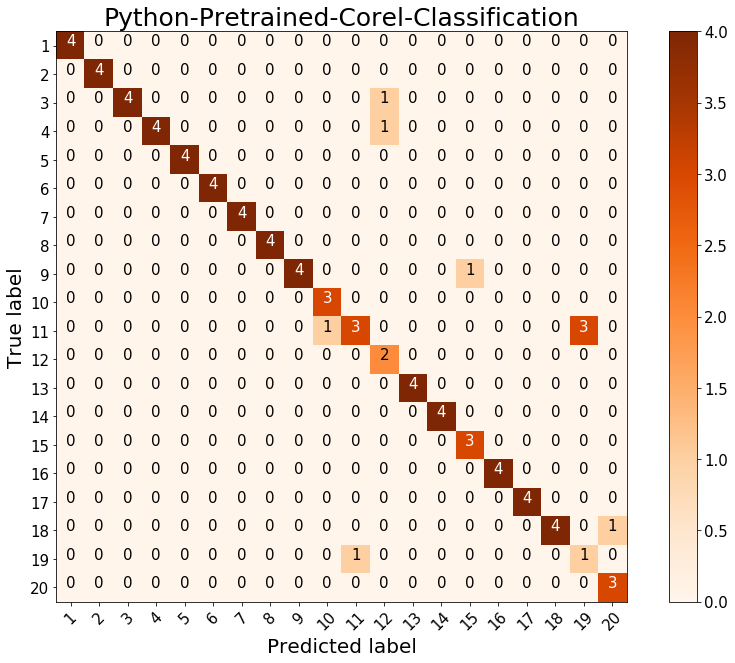

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
# a_pred = a_model.predict_classes(fc2_query200, batch_size=128, verbose=1)
#test_truth = q_listIndex
#a_actual = testTruth
a_cm = confusion_matrix(a_pred, testTruth) 
plot_confusion_matrix(a_cm, classes=classes, 
                      title='Python-Pretrained-Corel-Classification')
plt.savefig('Python-Pretrained-Corel-Classification.pdf')
plt.show()


In [32]:
count = 0
total = len(testTruth)
for i in range(total):
    if testTruth[i] == a_pred[i]:
        count += 1
accuracy = float(count)/total
print("Corel画像の分類精度 = ",accuracy) 


Corel画像の分類精度 =  0.8875
